In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMAZON
2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59715200,AMAZON
2024-02-26,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,AMAZON
2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31141700,AMAZON
2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,AMAZON
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37163200,AMAZON


<Axes: xlabel='Date'>

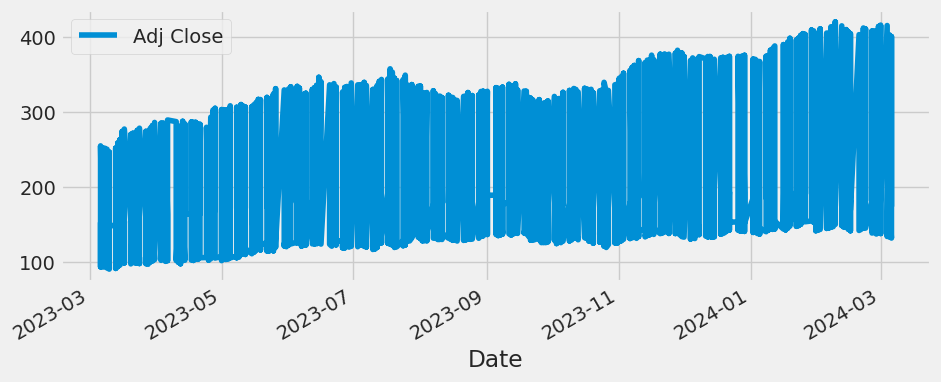

In [5]:
#Calculate the change in price of the stock over time
df['Adj Close'].plot(legend=True, figsize=(10,4))


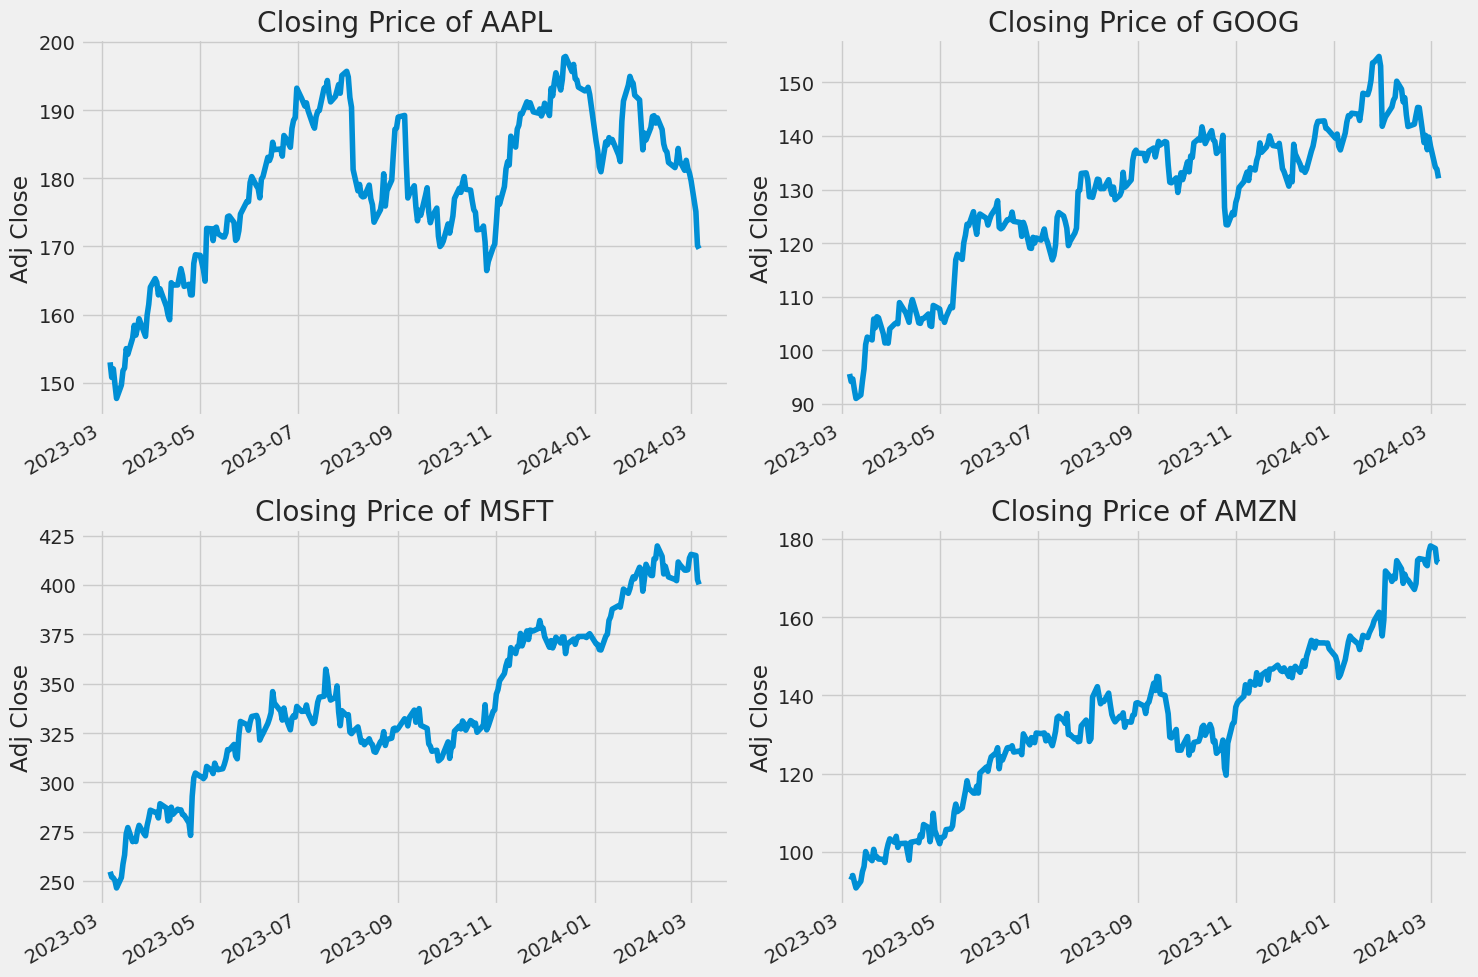

In [39]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

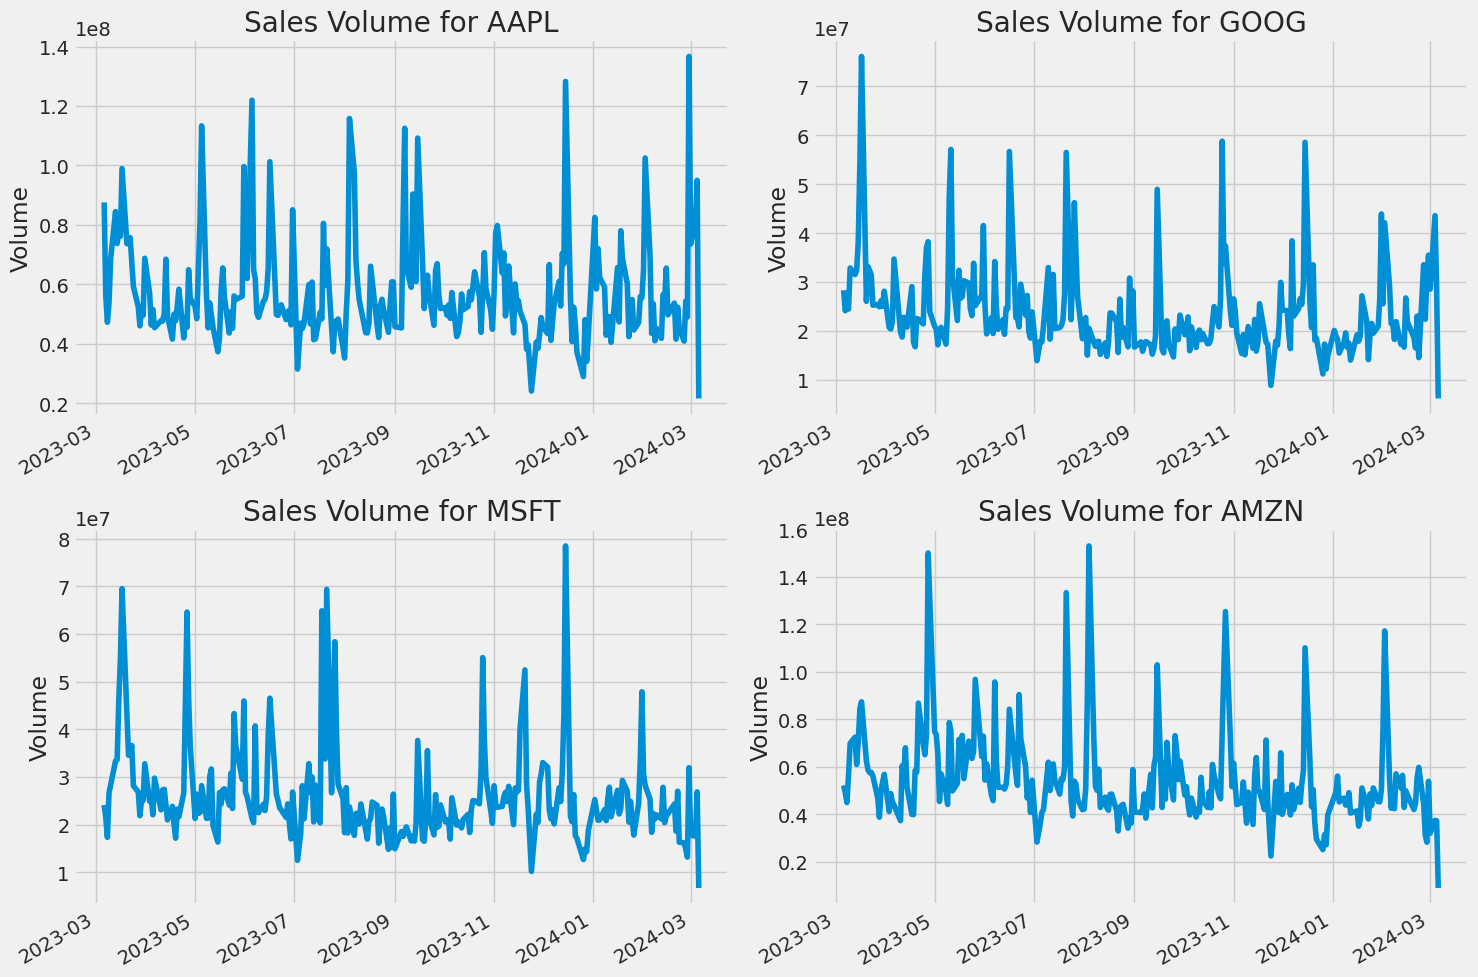

In [40]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

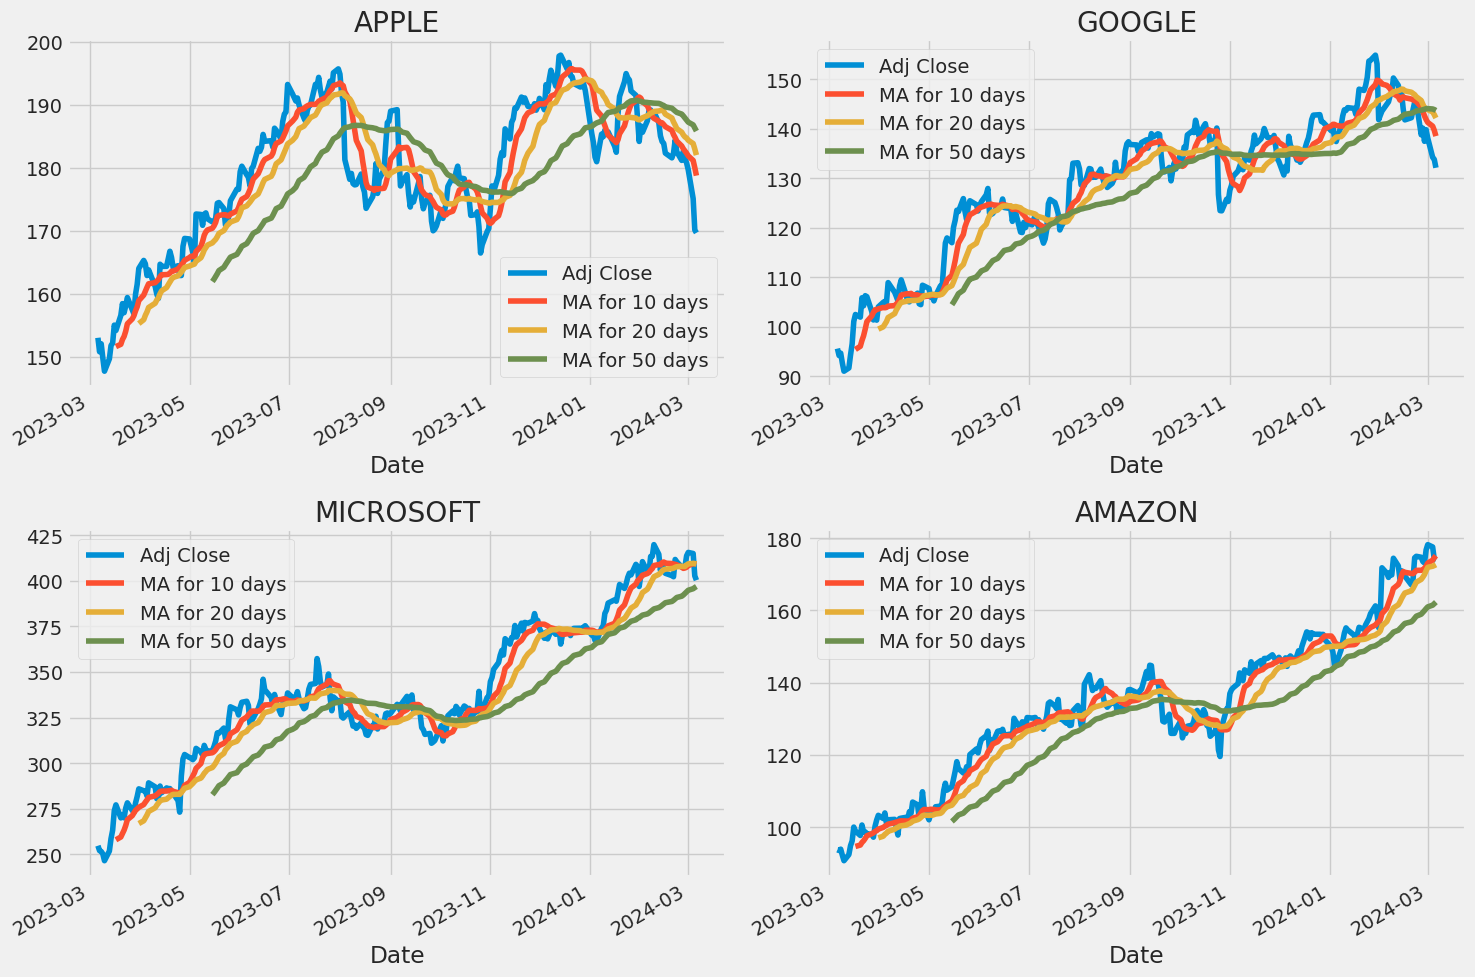

In [41]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


<ipython-input-6-a76077bf8d6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

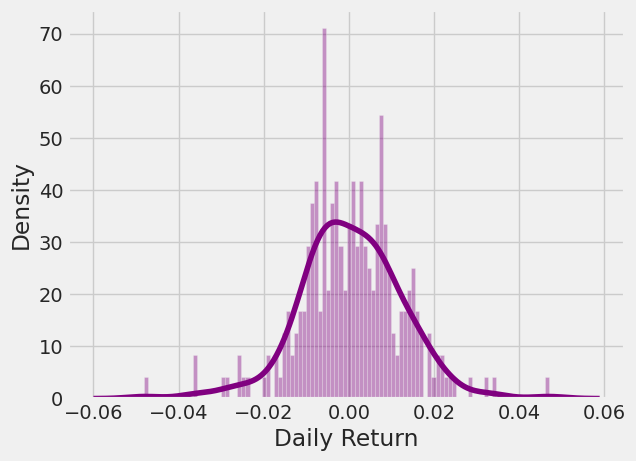

In [6]:
# 2. Calculate the daily return of the stock on average
for stock in company_list:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


In [7]:
# 3. Calculate the moving average of the various stocks
ma_day = [10, 20, 50]

for ma in ma_day:
    for stock in company_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()


In [12]:
pip install yfinance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


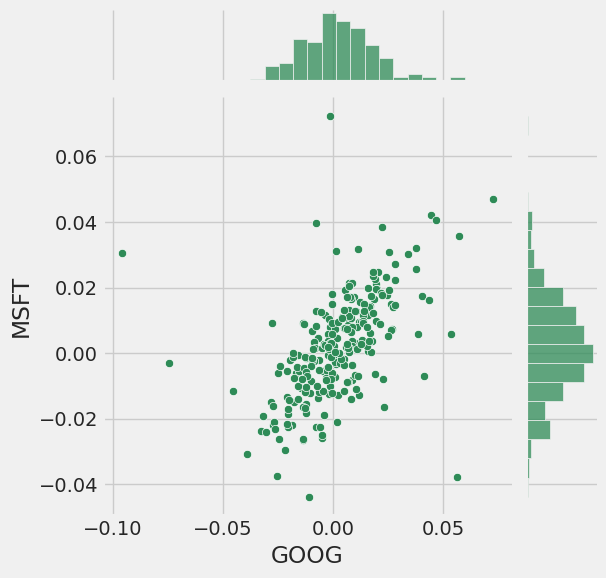

In [14]:
import seaborn as sns
import yfinance as yf
import pandas as pd
import datetime

# Define start and end dates
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data for each stock separately
aapl_data = yf.download('AAPL', start=start, end=end)['Adj Close']
goog_data = yf.download('GOOG', start=start, end=end)['Adj Close']
msft_data = yf.download('MSFT', start=start, end=end)['Adj Close']
amzn_data = yf.download('AMZN', start=start, end=end)['Adj Close']

# Combine data into a DataFrame
closing_df = pd.DataFrame({
    'AAPL': aapl_data,
    'GOOG': goog_data,
    'MSFT': msft_data,
    'AMZN': amzn_data
})

# Calculate daily returns
tech_rets = closing_df.pct_change()

# Plot correlation between GOOG and MSFT
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')


<ipython-input-15-a8793aa309fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


Value at Risk at 95% confidence: $ -0.0171


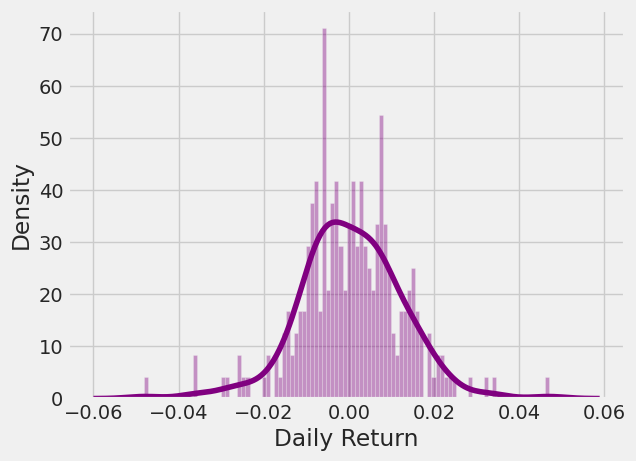

In [15]:
# 5. Determine the value at risk by investing in a particular stock
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

# 95% confidence VaR
print('Value at Risk at 95% confidence: $', round(AAPL['Daily Return'].quantile(0.05), 4))


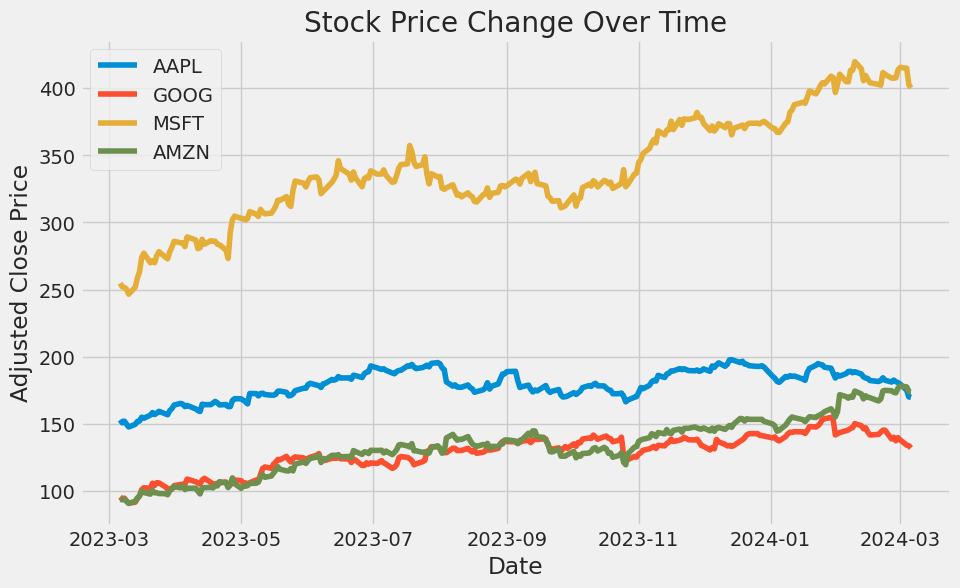

In [24]:
#Calculate the change in price of the stock over time
plt.figure(figsize=(10, 6))
for company in tech_list:
    plt.plot(df[df['Company'] == company]['Date'], df[df['Company'] == company]['Adj Close'], label=company)

plt.title('Stock Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [16]:
# 95% confidence VaR
print('Value at Risk at 95% confidence: $', round(AAPL['Daily Return'].quantile(0.05), 4))

Value at Risk at 95% confidence: $ -0.0171


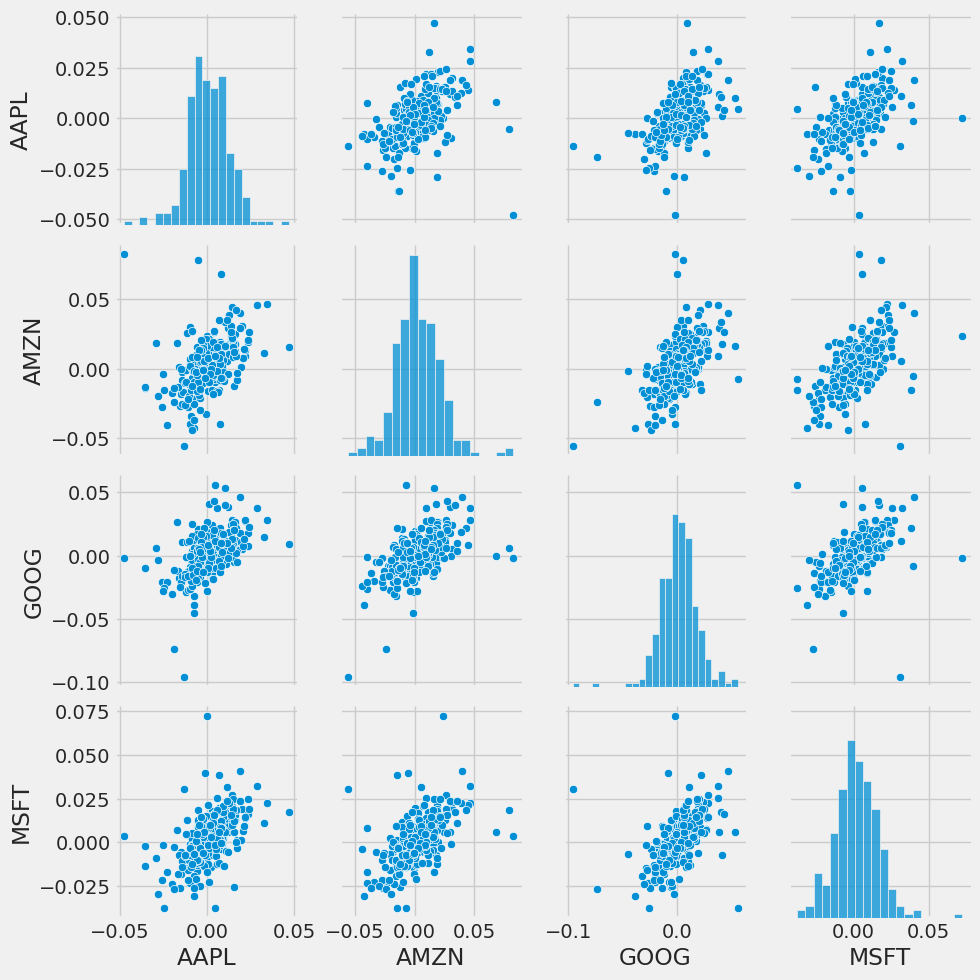

In [27]:
#Calculate the correlation between different stocks
closing_df = df.pivot(index='Date', columns='Company', values='Adj Close')
tech_rets = closing_df.pct_change()
sns.pairplot(tech_rets.dropna())
plt.show()


Text(0.5, 1.0, 'Correlation of stock closing price')

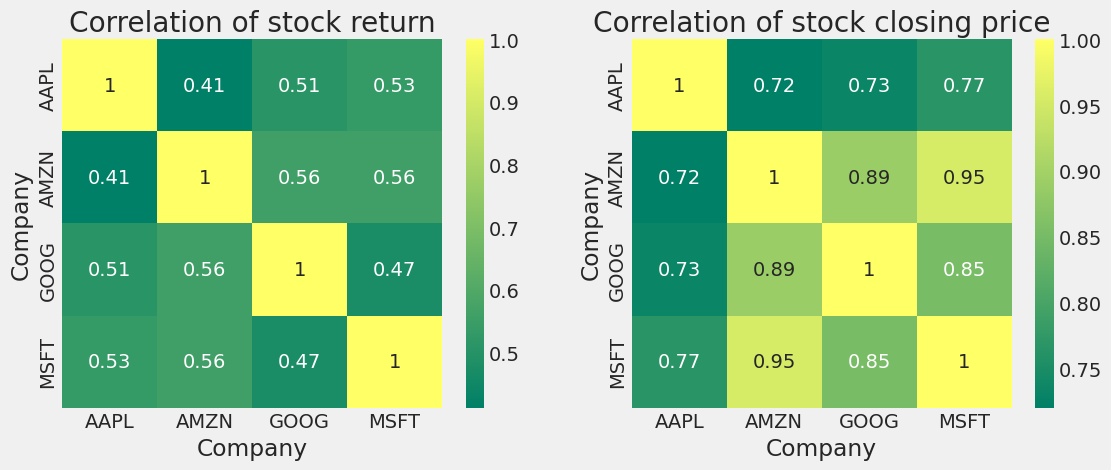

In [42]:
#Correlation plot
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

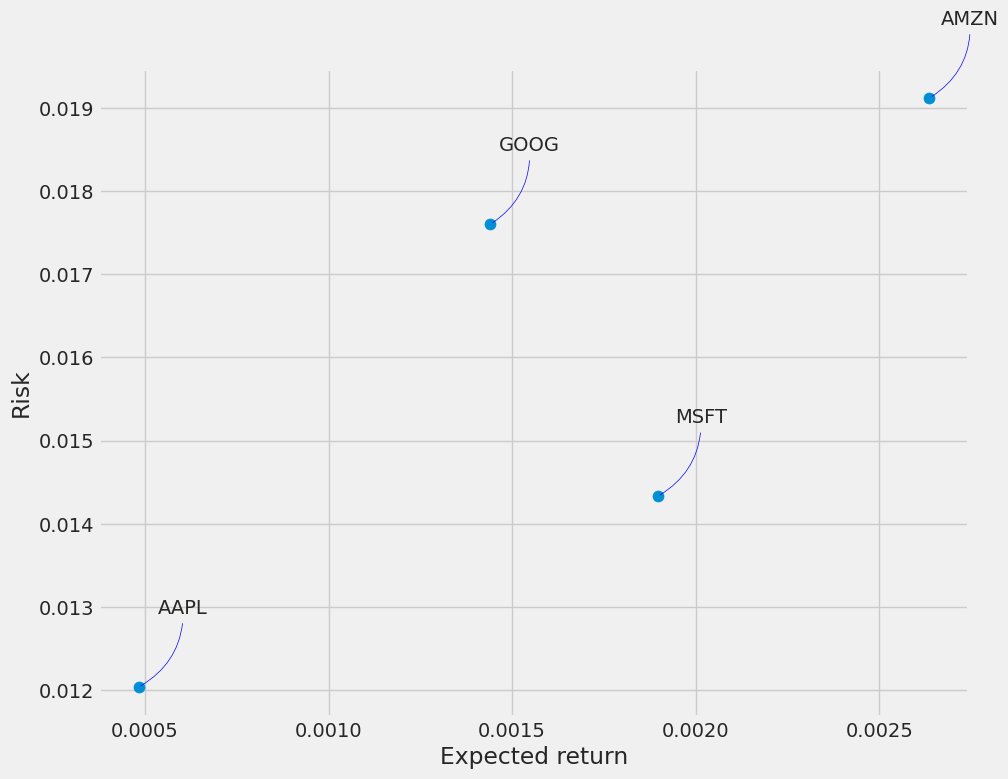

In [43]:
#How much value we put at risk
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [29]:
# Download stock data for each company in the tech list
company_data = {}
for stock_symbol in tech_list:
    company_data[stock_symbol] = yf.download(stock_symbol, start=start, end=end)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
# Combine data for all companies into a single DataFrame
df = pd.concat(company_data.values(), keys=company_data.keys(), names=['Company', 'Date'])

In [31]:

# Reset index
df.reset_index(inplace=True)


In [36]:
# Fetch news articles for each company
from newspi import NewsApiClient

news_articles = {}
for company in tech_list:
    news_articles[company] = newspi.get_everything(q=company, language='en', from_param=start, to=end)


ModuleNotFoundError: No module named 'newspi'

In [17]:
#Implement an LSTM model for predicting the closing stock price of APPLE Inc.
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(AAPL['Adj Close'].values.reshape(-1,1))

In [19]:
# Split data
prediction_days = 30
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [20]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
7/7 [==============================] - 6s 25ms/step - loss: 0.1953
Epoch 2/25
7/7 [==============================] - 0s 25ms/step - loss: 0.0429
Epoch 3/25
7/7 [==============================] - 0s 24ms/step - loss: 0.0233
Epoch 4/25
7/7 [==============================] - 0s 24ms/step - loss: 0.0137
Epoch 5/25
7/7 [==============================] - 0s 27ms/step - loss: 0.0143
Epoch 6/25
7/7 [==============================] - 0s 25ms/step - loss: 0.0106
Epoch 7/25
7/7 [==============================] - 0s 25ms/step - loss: 0.0112
Epoch 8/25
7/7 [==============================] - 0s 24ms/step - loss: 0.0104
Epoch 9/25
7/7 [==============================] - 0s 25ms/step - loss: 0.0099
Epoch 10/25
7/7 [==============================] - 0s 25ms/step - loss: 0.0102
Epoch 11/25
7/7 [==============================] - 0s 40ms/step - loss: 0.0098
Epoch 12/25
7/7 [==============================] - 0s 40ms/step - loss: 0.0096
Epoch 13/25
7/7 [==============================] - 0s 39ms/st

In [21]:
# Test the model accuracy
test_data = scaled_data[len(scaled_data) - prediction_days:, :]
x_test = []
x_test.append(test_data)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 [==============================] - 2s 2s/step


ValueError: x and y must have same first dimension, but have shapes (30,) and (1, 1)

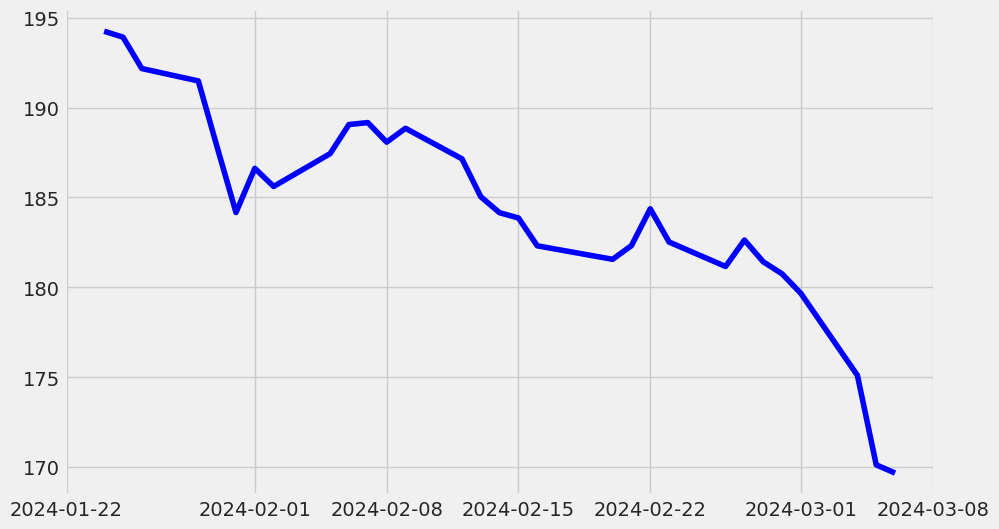

In [22]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(AAPL.index[-prediction_days:], scaler.inverse_transform(test_data), color='blue', label='Actual AAPL Price')
plt.plot(AAPL.index[-prediction_days:], predicted_prices, color='red', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()